## ML Revolution in Healthcare: The Diabetes Risk Prediction.
This project addresses the pressing issue of diabetes prevalence in the United States, aiming to predict distinct risk categories using the Behavioral Risk Factor Surveillance System (BRFSS) 2015 dataset. The dataset, comprising 50,000 survey responses, poses a challenge due to class imbalance. The objective is to develop a predictive model that effectively classifies individuals into three categories: 0 for no diabetes/only during pregnancy, 1 for prediabetes, and 2 for diabetes. The emphasis is on mitigating class imbalance to enhance the accuracy of the predictive modeling process.

**About the Dataset:**
The dataset used in this project is sourced from the CDC's Behavioral Risk Factor Surveillance System (BRFSS) 2015, obtained from the UC Irvine Machine Learning Repository. It comprises 21 feature variables and a target variable (Diabetes_012) categorizing respondents into stages: 0 for no diabetes/only during pregnancy, 1 for prediabetes, and 2 for diabetes.

### Intial Exploration:


In [72]:
#--- Import necessary libraries ---
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Read the training data
df0 = pd.read_csv('./train_dataset.csv')

# write youe code here

#df0.head()
df = df0.copy()

#df.head()
#print(df.shape)
#df.info()
#df.describe()

print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)
print('Total count of missing values:', df.isna().sum().sum())
print('Missing values per column:')
df.isna().sum()


Shape of dataframe: (51018, 22)
Shape of dataframe with duplicates dropped: (49671, 22)
Total count of missing values: 2149
Missing values per column:


Diabetes_012              0
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                     800
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity            113
Fruits                    0
Veggies                 118
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   0
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                     551
Education                 0
Income                  567
dtype: int64

### Data Cleaning:


In [73]:
df = df.drop_duplicates(ignore_index=True)
#print(df.shape)
#df.head()

#df.value_counts('BMI')

#df[(df['Age'].isna())]

df1 = df.copy()

df = df.dropna(axis=0, ignore_index=True)

### Transforming Data:


In [74]:
df['Diabetes_012'] = df['Diabetes_012'].astype(int)
df['BMI'] = df['BMI'].astype(int)
df[['GenHlth','MentHlth','PhysHlth','Age','Education', 'Income']] = df[['GenHlth','MentHlth','PhysHlth','Age','Education', 'Income']].astype(int)

df['HighBP'] = df['HighBP'].map({'Yes': 1, 'No': 0})

#df[['HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits',
#'Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk']] = df[['HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk']].map({'Yes': 1, 'No': 0})

df['HighChol'] = df['HighChol'].map({'Yes': 1, 'No': 0})
df['CholCheck'] = df['CholCheck'].map({'Yes': 1, 'No': 0})
df['Smoker'] = df['Smoker'].map({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].map({'Yes': 1, 'No': 0})
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({'Yes': 1, 'No': 0})
df['PhysActivity'] = df['PhysActivity'].map({'Yes': 1, 'No': 0})
df['Fruits'] = df['Fruits'].map({'Yes': 1, 'No': 0})
df['Veggies'] = df['Veggies'].map({'Yes': 1, 'No': 0})
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map({'Yes': 1, 'No': 0})
df['AnyHealthcare'] = df['AnyHealthcare'].map({'Yes': 1, 'No': 0})
df['NoDocbcCost'] = df['NoDocbcCost'].map({'Yes': 1, 'No': 0})
df['DiffWalk'] = df['DiffWalk'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

df.head()
#df.value_counts('Age')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,28,0,0,1,1,1,...,1,0,3,0,0,0,1,10,6,6
1,1,0,1,1,38,0,0,0,0,1,...,0,1,4,7,0,0,0,3,5,6
2,2,1,0,1,28,1,0,0,1,0,...,1,0,2,0,0,0,1,11,6,6
3,0,0,1,1,20,1,0,0,0,1,...,1,0,4,30,30,1,0,7,2,2
4,0,0,0,1,36,0,0,0,1,1,...,1,0,3,3,3,0,0,5,4,5


### Handling Outliers: 


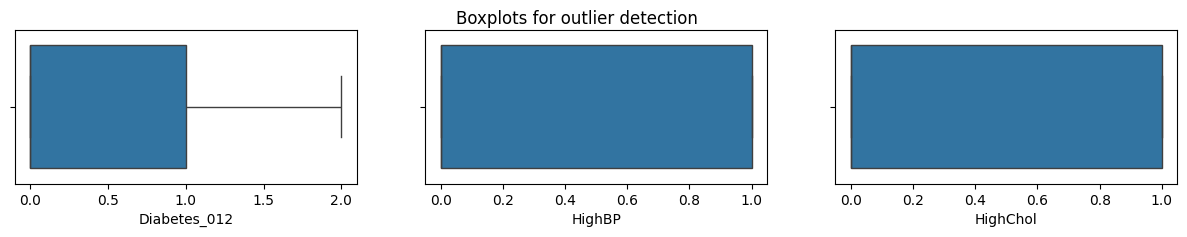

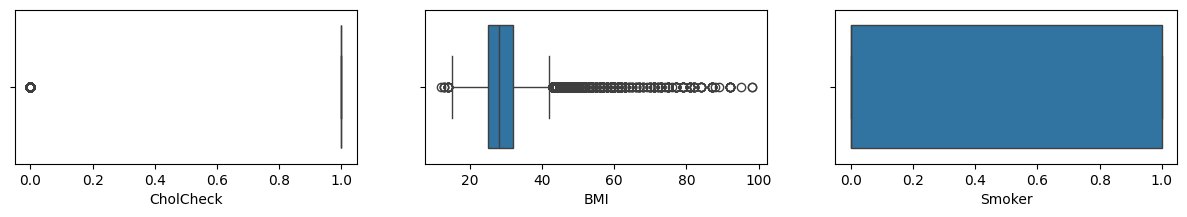

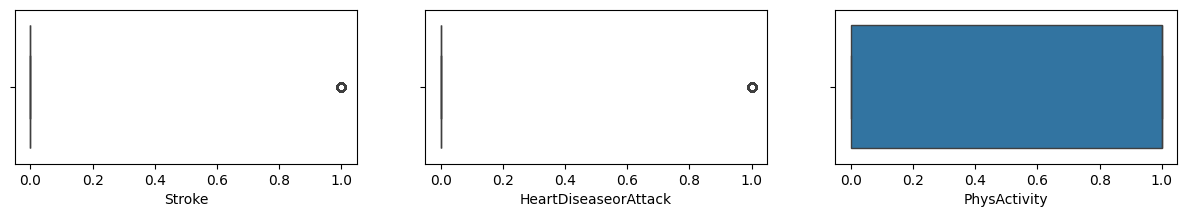

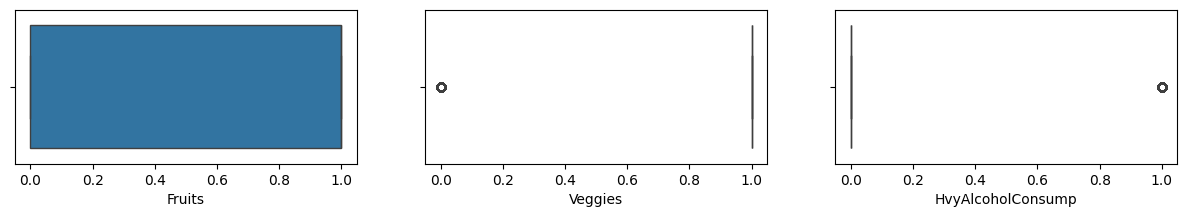

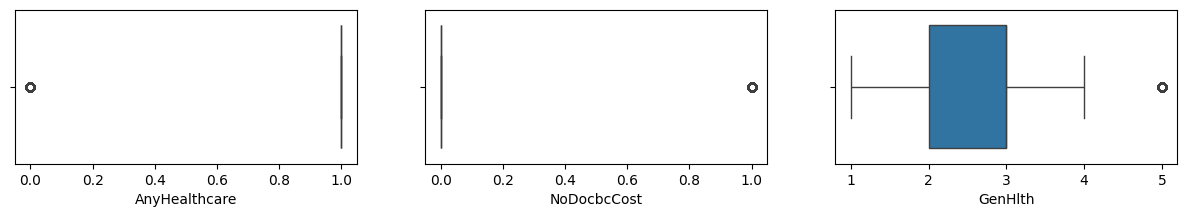

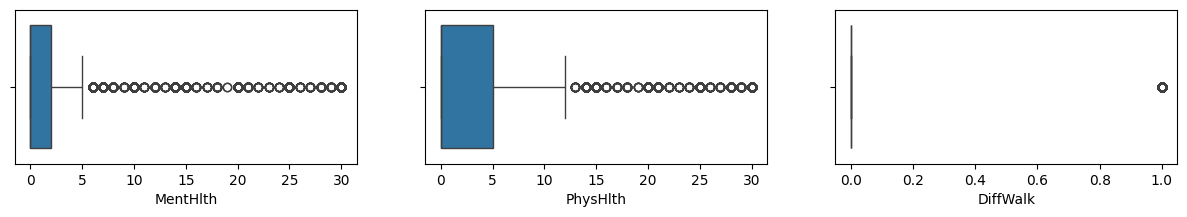

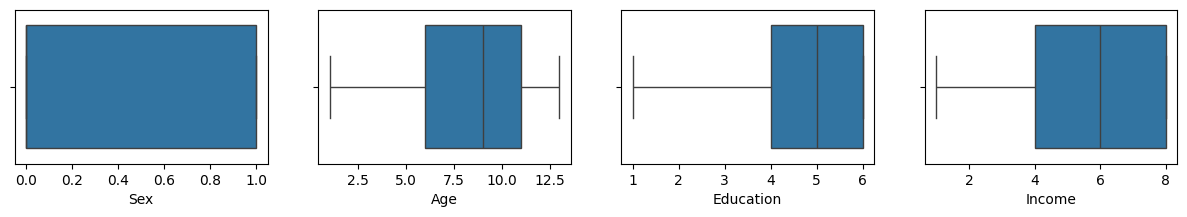

In [75]:
# Build the machine leaning models
#df.info()
df2 = df.copy()

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['Diabetes_012'])
sns.boxplot(ax=axes[1], x=df['HighBP'])
sns.boxplot(ax=axes[2], x=df['HighChol'])
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(ax=axes[0], x=df['CholCheck'])
sns.boxplot(ax=axes[1], x=df['BMI'])
sns.boxplot(ax=axes[2], x=df['Smoker'])
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(ax=axes[0], x=df['Stroke'])
sns.boxplot(ax=axes[1], x=df['HeartDiseaseorAttack'])
sns.boxplot(ax=axes[2], x=df['PhysActivity'])
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(ax=axes[0], x=df['Fruits'])
sns.boxplot(ax=axes[1], x=df['Veggies'])
sns.boxplot(ax=axes[2], x=df['HvyAlcoholConsump'])
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(ax=axes[0], x=df['AnyHealthcare'])
sns.boxplot(ax=axes[1], x=df['NoDocbcCost'])
sns.boxplot(ax=axes[2], x=df['GenHlth'])
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(ax=axes[0], x=df['MentHlth'])
sns.boxplot(ax=axes[1], x=df['PhysHlth'])
sns.boxplot(ax=axes[2], x=df['DiffWalk'])
plt.show();

fig, axes = plt.subplots(1, 4, figsize=(15, 2))
sns.boxplot(ax=axes[0], x=df['Sex'])
sns.boxplot(ax=axes[1], x=df['Age'])
sns.boxplot(ax=axes[2], x=df['Education'])
sns.boxplot(ax=axes[3], x=df['Income'])
plt.show();

# possibly
# Unbalanced columns: CholCheck, Stroke, HeartDiseaseorAttack, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk
# Outliers columns: BMI, GenHlth, MentHlth, PhysHlth
# Biased data columns: Age, Education, Income

df3 = df.copy()

### Data Splitting:


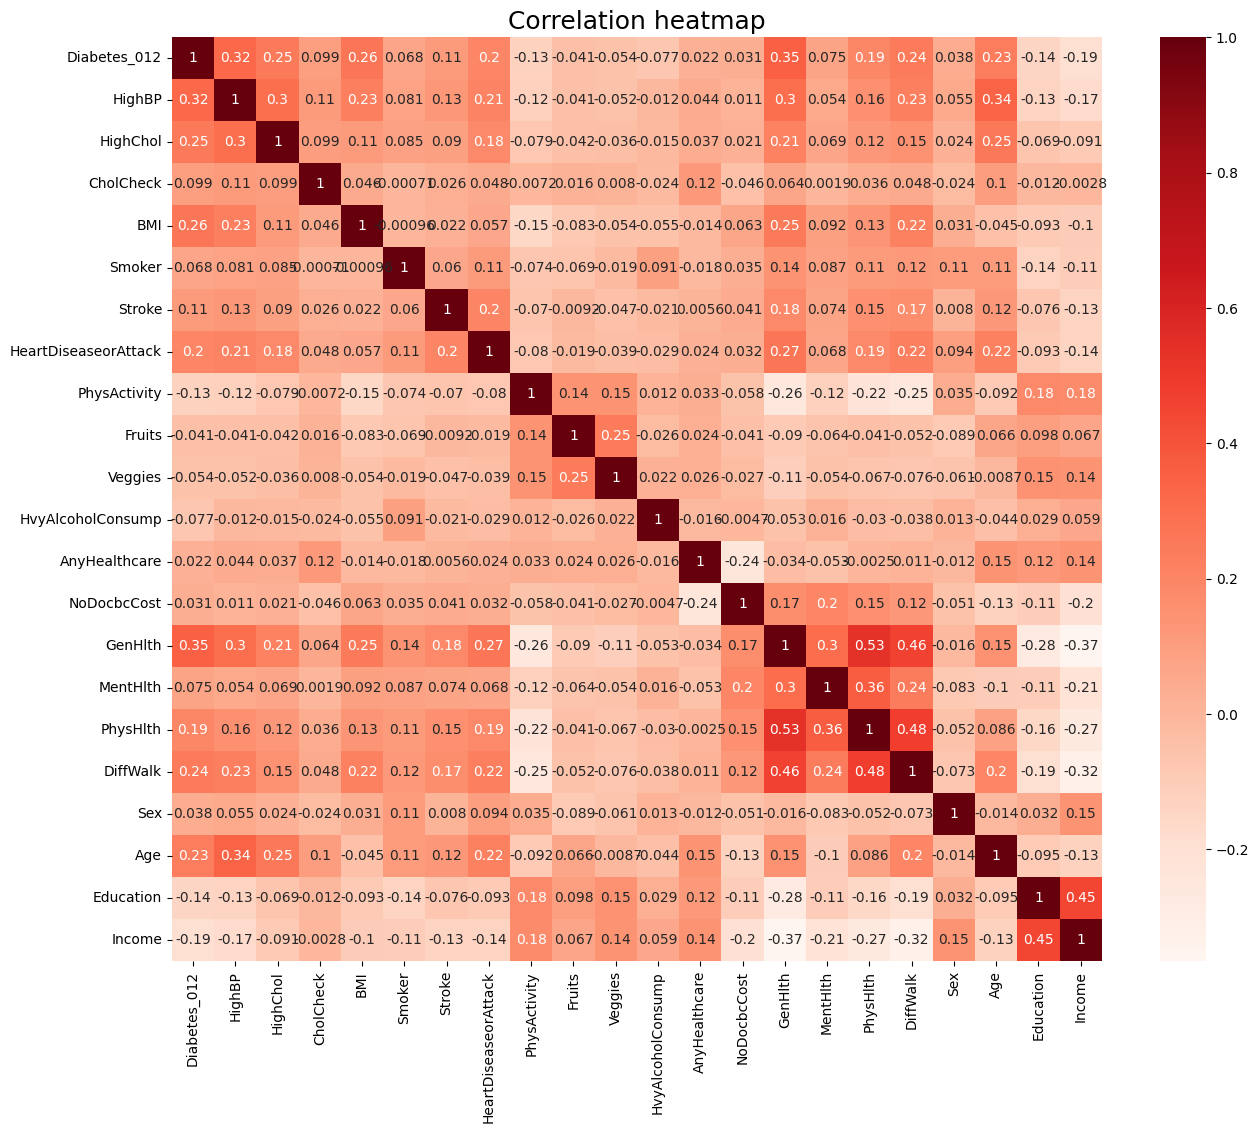

In [76]:
# train the models with the train data

#(df['PhysHlth']==30).value_counts()
#sum(df['HighBP']==0)

# possible important factors:
# Diabetes_012 (target)
# BMI,  Age, 
# HighBP, HighChol,Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, MentHlth, Sex, Income   

# Scatter plot of duration and trip_distance, with a line of best fit (not the best beacuse not linear relationship between factors)

#sns.set(style='whitegrid')
#f = plt.figure()
#f.set_figwidth(5)
#f.set_figheight(5)
#sns.regplot(x=df['BMI'], y=df['Diabetes_012'],
#            scatter_kws={'alpha':0.5, 's':5},
#            line_kws={'color':'red'})
#plt.ylim(0, 3)
#plt.xlim(0, 100)
#plt.title('BMI x Diabetes')
#plt.show()


# Correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
# Diabetes mostly correlated to GenHlth, HighBP, BMI, HighChol, DiffWalk, Age, HeartDiseaseorAttack, PhysHlth





plt.show()

### Model Selection:


In [77]:
# write code here


### Model Training:


In [78]:
# write code here

### Hyperparameter Tuning:


In [79]:
# write code here

### Predicting:


In [80]:
# write code here

### Post-Prediction Processing:


In [81]:
# write code here